In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv'
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [4]:
df.shape

(891, 12)

The dataset contains 891 entries and consists of 12 columns. Among these, 'survived' is the target variable, while the other 11 columns represent independent variables.

In [5]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The dataset consists of three different data types: 'object', 'int64', and 'float64'.

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

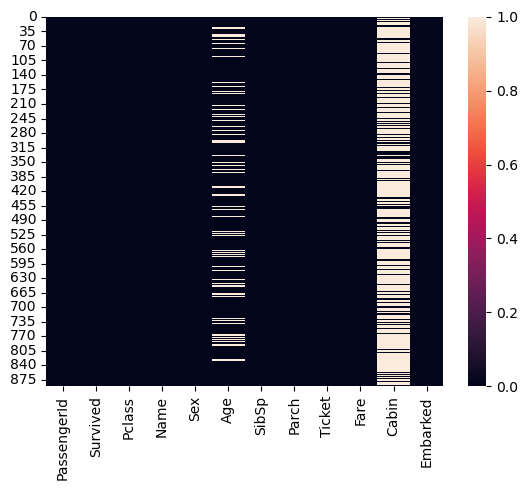

In [9]:
sns.heatmap(df.isnull())

In [10]:
for i in df.columns:
    print (df[i].value_counts())
    print ("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50  

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [14]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

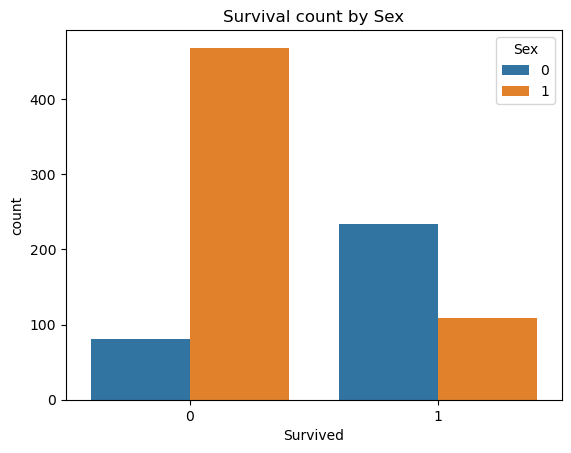

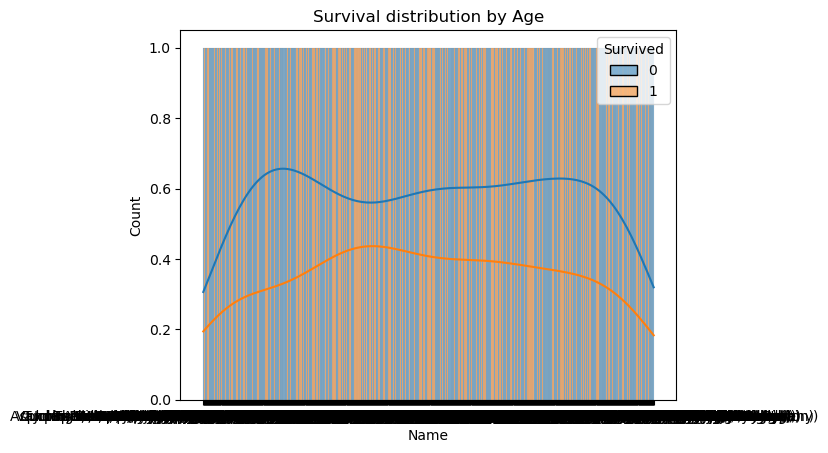

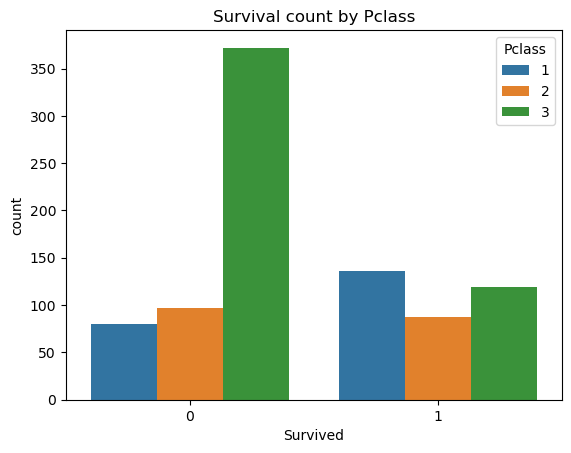

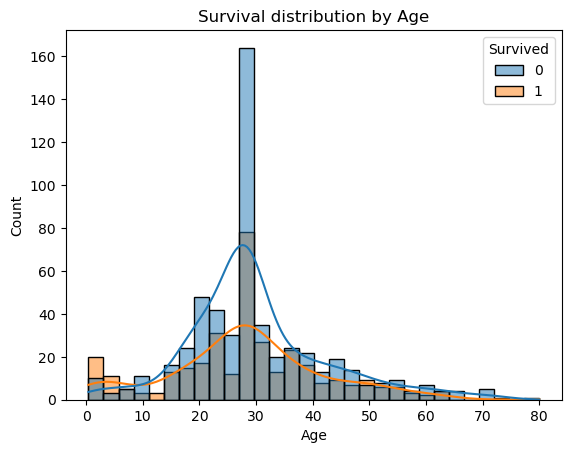

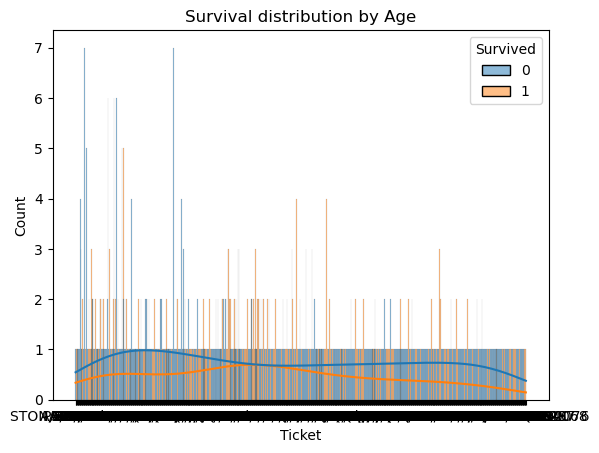

In [21]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival count by Sex')
plt.show()

sns.histplot(data=df, x='Name', hue='Survived', kde=True)
plt.title('Survival distribution by Age')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival count by Pclass')
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Survival distribution by Age')
plt.show()

sns.histplot(data=df, x='Ticket', hue='Survived', kde=True)
plt.title('Survival distribution by Age')
plt.show()

1. 'PassengerId', 'Name', and 'Ticket' are typically considered identifiers or non-predictive features that don't contain information relevant to predicting the target variable. 
2. Removing irrelevant or non-predictive features simplifies the model and reduces the risk of overfitting.

In [27]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])
print("Numerical columns:")
print(numerical_columns.columns)
print("\nCategorical columns:")
print(categorical_columns.columns)

Numerical columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Categorical columns:
Index(['Name', 'Ticket'], dtype='object')


In [18]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

Including the target variable ('Survived') in the feature matrix can lead to data leakage, where the model learns to predict the target using information that would not be available at the time of prediction. This can result in overly optimistic performance estimates during training and poor generalization to new data.

In [28]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [29]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

1. The mean survival rate among passengers is approximately 38%, indicating that about 38% of the passengers in the dataset survived the Titanic disaster.
2. The age of passengers ranges from 0.42 to 80 years, with a mean age of approximately 29.36 years. The majority of passengers fall within the range of 22 to 35 years, as indicated by the interquartile range.
3. Around 64.76% of the passengers are male (encoded as 1), while approximately 35.24% are female (encoded as 0). This indicates a male majority among the passengers in the dataset.

In [32]:
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

1. 25% of the data have a survival value of 0, while 75% have a survival value of 1, suggesting a significant portion of passengers survived.

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=80, random_state=50)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=50)

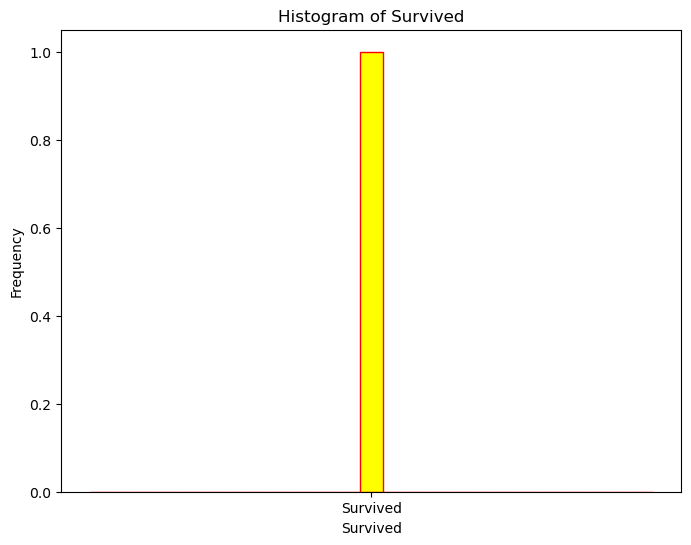

In [33]:
plt.figure(figsize=(8, 6))
plt.hist('Survived', bins=25, color='yellow', edgecolor='red')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Histogram of Survived')
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


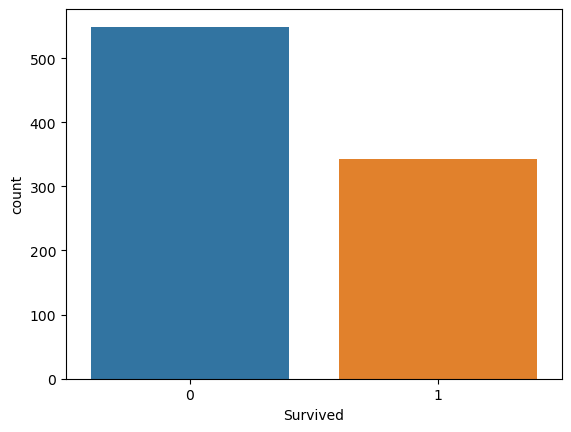

In [34]:
ax =sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

In [35]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [36]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8059701492537313
Confusion Matrix:
[[141  21]
 [ 31  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       162
           1       0.78      0.71      0.74       106

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



1. The model achieved an overall accuracy of approximately 80.6%, meaning it correctly predicted the survival outcome for around 80.6% of the passengers in the dataset.

2. Looking at the confusion matrix, out of 268 instances:
        141 instances of passengers who did not survive were correctly classified as such.
        75 instances of passengers who survived were correctly classified.
        21 instances of passengers who did not survive were incorrectly classified as survivors (false positives).
        31 instances of passengers who survived were incorrectly classified as non-survivors (false negatives).
        
3. The classification report provides further insight into the model's performance by considering metrics like precision, recall, and F1-score for each class (survived and did not survive). Overall, the model shows reasonably good precision and recall for both classes, with slightly higher performance metrics for the negative class (did not survive).

In [69]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
mode_sex = test_data['Sex'].mode()
test_data['Sex'] = test_data['Sex'].fillna(mode_sex)
if test_data['Sex'].isnull().any():
    default_sex = 0
    test_data['Sex'] = test_data['Sex'].fillna(default_sex)


In [72]:
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
if test_data['Embarked'].isnull().any():
    default_sex = 0
    test_data['Embarked'] = test_data['Embarked'].fillna(default_sex)

test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [76]:
test_X = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
predictions = rf_classifier.predict(test_X)svm_classifier = SVC()
submission_df = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions})
submission_df.to_csv('url', index=False)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [89]:
predictions = gb_classifier.predict(test_X)

In [90]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [93]:
test_y = test_data['Survived']
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)
roc_auc = roc_auc_score(test_y, predictions)

In [94]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Evaluation Metrics:
Accuracy: 0.5241
Precision: 0.4455
Recall: 0.9795
F1-score: 0.6124
ROC-AUC Score: 0.6100


1. The model achieves a relatively low accuracy of 52.41%, indicating that it correctly predicts the outcome for only about half of the instances.

2. Precision, measuring the proportion of true positive predictions among all positive predictions, is at 44.55%, suggesting that there's a moderate level of false positives.

3. Despite the low accuracy and precision, the model demonstrates a high recall of 97.95%, implying that it effectively identifies the majority of the actual positive cases. However, this high recall comes at the cost of lower precision.

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
passenger_index = 8
passenger_data = df.loc[passenger_index, ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]
passenger_data_dict = passenger_data.to_dict()
passenger_data_dict

{'Age': 27.0,
 'Sex': 0,
 'Pclass': 3,
 'SibSp': 0,
 'Parch': 2,
 'Fare': 11.1333,
 'Embarked': 2}

In [106]:
passenger_df = pd.DataFrame([passenger_data_dict], index=[passenger_index])
passenger_df = pd.get_dummies(passenger_df, columns=['Sex', 'Embarked'])
passenger_df

,Age,Pclass,SibSp,Parch,Fare,Sex_0,Embarked_2
8,27.0,3,0,2,11.1333,True,True


In [123]:
X = passenger_df.drop('Pclass', axis=1)
y = passenger_df['Pclass']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1, 6)
Shape of y: (1,)


In [126]:
feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_importances)

[('Sex', 0.3007455673847161), ('Age', 0.25004894124256116), ('Fare', 0.2491348768847056), ('Pclass', 0.11400904013554841), ('SibSp', 0.035660320941786464), ('Embarked', 0.029985706499412526), ('Parch', 0.020415546911269778)]


1. The provided list contains feature importance scores for predicting a target variable, with the feature 'Sex' having the highest importance score of 0.3007.

2. Following 'Sex', 'Age' and 'Fare' also contribute significantly to the prediction, with importance scores of 0.2500 and 0.2491 respectively.

3. Features such as 'Pclass', 'SibSp', 'Embarked', and 'Parch' have comparatively lower importance scores, indicating lesser influence on the prediction compared to the aforementioned features.